In [1]:
from qiskit import QuantumCircuit, Aer, assemble
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.visualization import array_to_latex

# Representing Multi-Qubit States

for generating $|+++\rangle$

In [2]:
qc = QuantumCircuit(3)
# Apply H-gate to each qubit:
for qubit in range(3):
    qc.h(qubit)
# See the circuit:
qc.draw()
# Let's see the result
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

## Quick Exercises:

1. Write down the kronecker product of the qubits:

a) $|0\rangle|1\rangle$

In [3]:
qc = QuantumCircuit(2)
qc.x(0)
qc.draw()
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

b) $|0\rangle|+\rangle$

In [4]:
qc = QuantumCircuit(2)
qc.h(0)
qc.draw()
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

c) $|+\rangle|1\rangle$

In [5]:
qc = QuantumCircuit(2)
qc.x(0)
qc.h(1)
qc.draw()
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

d) $|-\rangle|+\rangle$

In [6]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
qc.draw()
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

2. Write the state:  $\frac{1}{\sqrt{2}}(|00\rangle+\dot{\iota}|01\rangle)$ as two separate qubits.

$\frac{1}{\sqrt{2}}|0\rangle(|0\rangle+\dot{\iota}|1\rangle)$


## Unitary matrix from the quantum circuit

In [7]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘

The unitary matrix operated on above circuit is $X\otimes H$. For obtaining this in the matrix form we can use the code given below,

In [8]:
usim = Aer.get_backend('aer_simulator')
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

## Quick Exercises:


1. Calculate the single qubit unitary (U) created by the sequence of gates: U=XZH. Use Qiskit's Aer simulator to check your results.


In [9]:
qc = QuantumCircuit(1)
qc.x(0)
qc.z(0)
qc.h(0)
qc.draw()
usim = Aer.get_backend('aer_simulator')
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

2. Try changing the gates in the circuit above. Calculate their kronecker product, and then check your answer using the Aer simulator.

In [10]:
qc = QuantumCircuit(3)
qc.x(2)
qc.z(1)
qc.h(0)
qc.draw()
usim = Aer.get_backend('aer_simulator')
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

# Multi qubit gates and visualizing entangled states

In [11]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
# Apply a CNOT:
qc.cx(0,1)
qc.draw()
# Let's get the result:
qc.save_statevector()
qobj = assemble(qc)
result = svsim.run(qobj).result()
# Print the statevector neatly:
final_state = result.get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

which is entangle state.

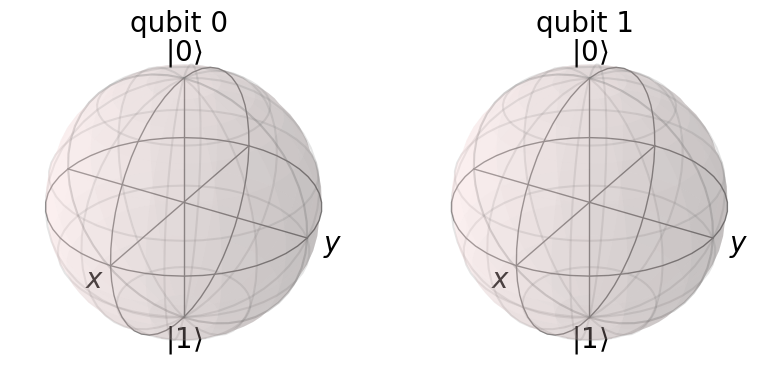

In [12]:
plot_bloch_multivector(final_state)

which shows that, if the state is entangled we can not show single qubit state on the bloch sphere. If the state is not entangled then,we can easily show the qubit in vector form as shown below.

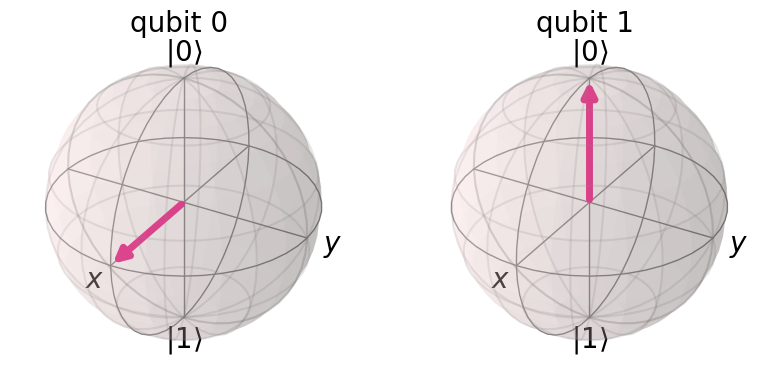

In [13]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
qc.draw()
# Let's get the result:
qc.save_statevector()
qobj = assemble(qc)
result = svsim.run(qobj).result()
# Print the statevector neatly:
final_state = result.get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector = }")
plot_bloch_multivector(final_state)

## Exercise:

1. Create a quantum circuit that produces the Bell state:$\frac{1}{\sqrt{2}}(|01\rangle+|10\rangle)$ . Use the statevector simulator to verify your result.

In [14]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.x(0)
qc.h(1)
qc.cx(1,0)
qc.draw()
# Let's get the result:
qc.save_statevector()
qobj = assemble(qc)
result = svsim.run(qobj).result()
# Print the statevector neatly:
final_state = result.get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

2. The circuit you created in question 1 transforms the state $|00\rangle$ to $\frac{1}{\sqrt{2}}(|01\rangle+|10\rangle)$ , calculate the unitary of this circuit using Qiskit's simulator. Verify this unitary does in fact perform the correct transformation.

In [15]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.x(0)
qc.h(1)
qc.cx(1,0)
usim = Aer.get_backend('aer_simulator')
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>